In [1]:
%matplotlib inline

In [3]:
import os
import warnings
import numpy as np
import pandas as pd
import nibabel as nib
warnings.filterwarnings('ignore')
from nilearn import plotting as nlp
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [5]:
# paths
brain_p = '/home/surchs/sim_big/ATLAS/MIST/Parcellations/MIST_12.nii.gz'
brain_i = nib.load(brain_p)
brain = brain_i.get_data()
label_p = '/home/surchs/sim_big/ATLAS/MIST/Parcel_Information/MIST_12.csv'
label = pd.read_csv(label_p, delimiter=';')
out_p = '/home/surchs/sim_big/PROJECT/simon_project/figures/'

In [8]:
# Define colormap for scale 12
s_colors = ['#8dd3c7','#ffffb3','#bebada',
             '#fb8072','#80b1d3','#fdb462',
             '#b3de69','#fccde5','#d9d9d9',
             '#bc80bd','#ccebc5','#ffed6f']
lin = LinearSegmentedColormap.from_list(name='s12',
                                          colors = s_colors,
                                          N=12)

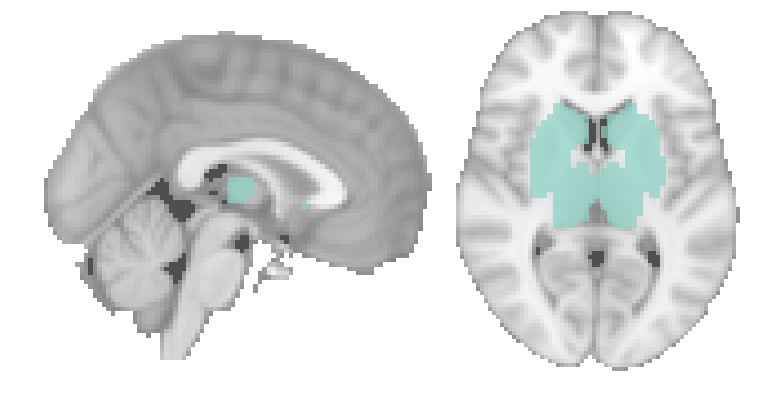

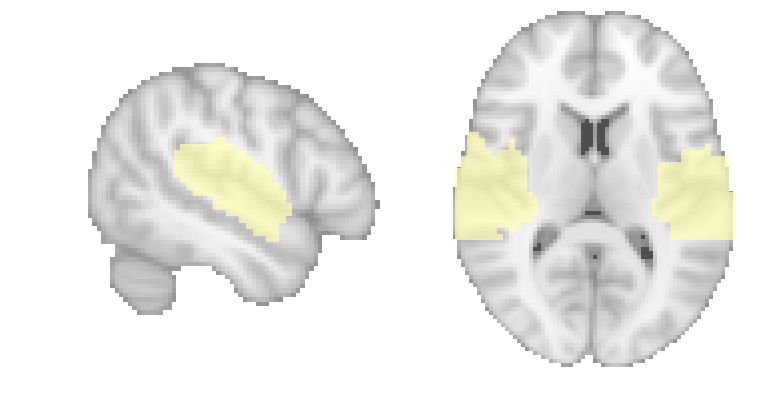

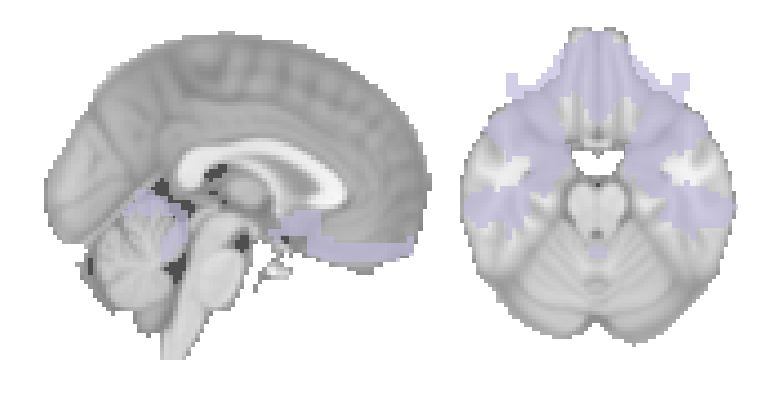

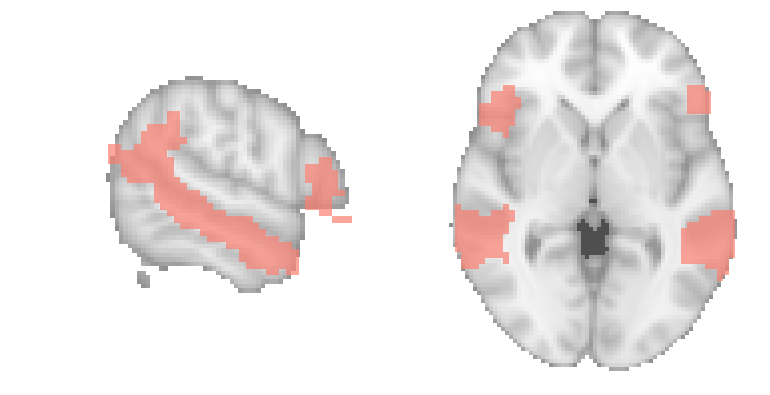

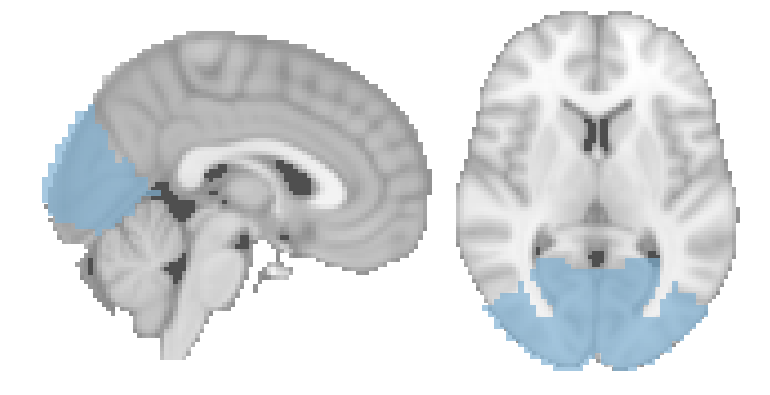

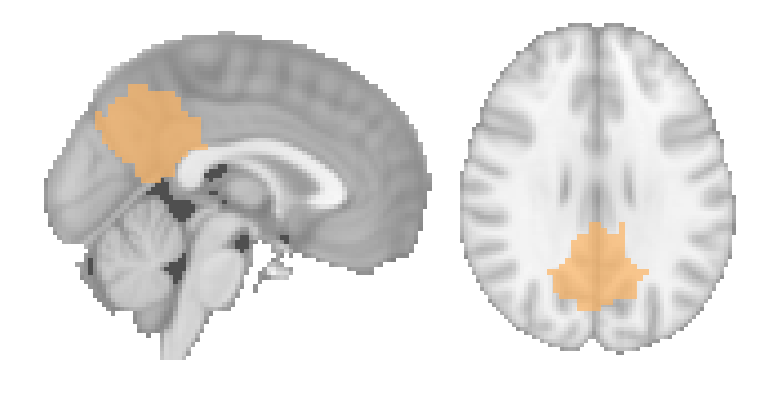

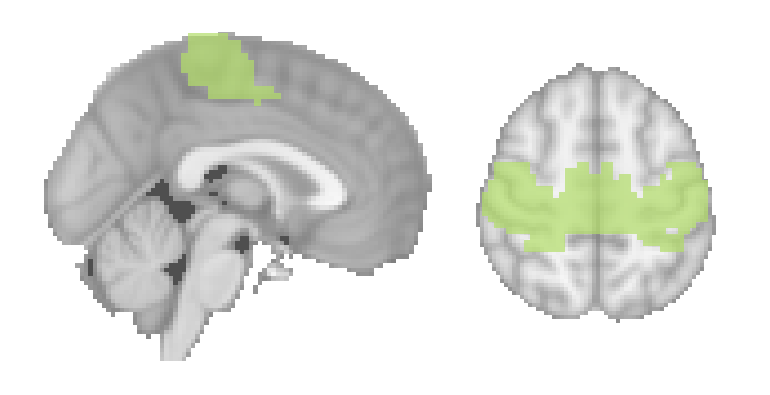

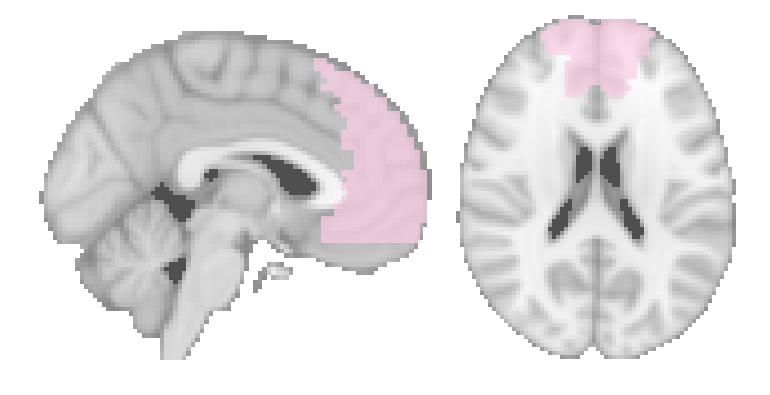

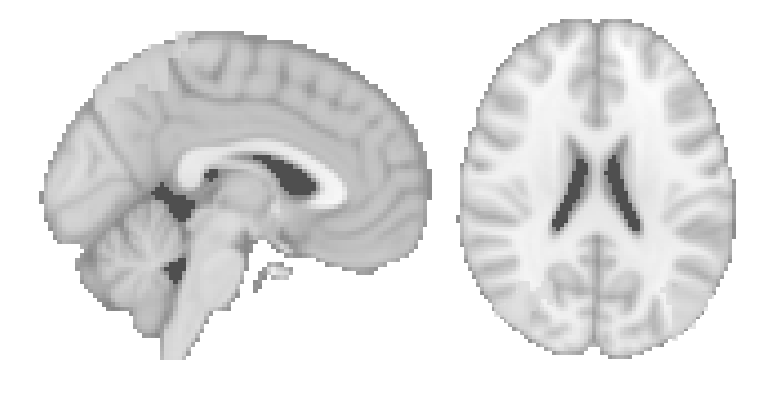

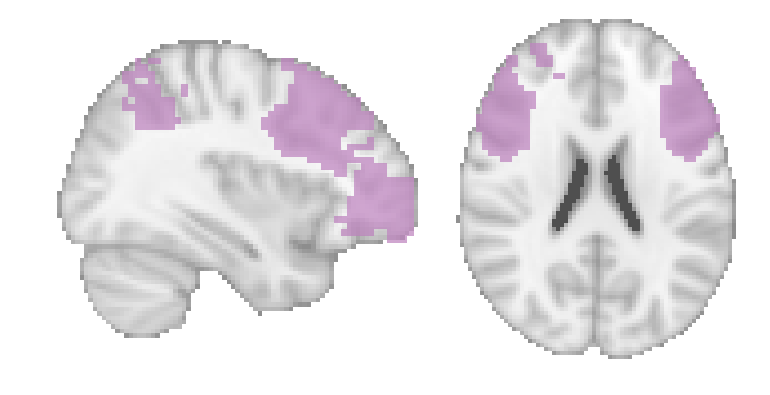

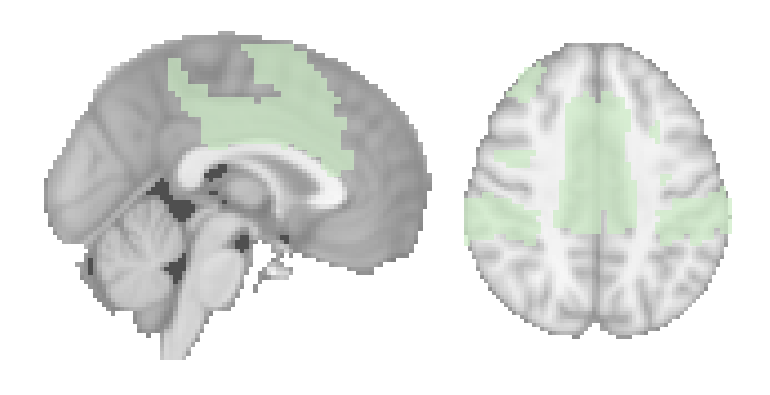

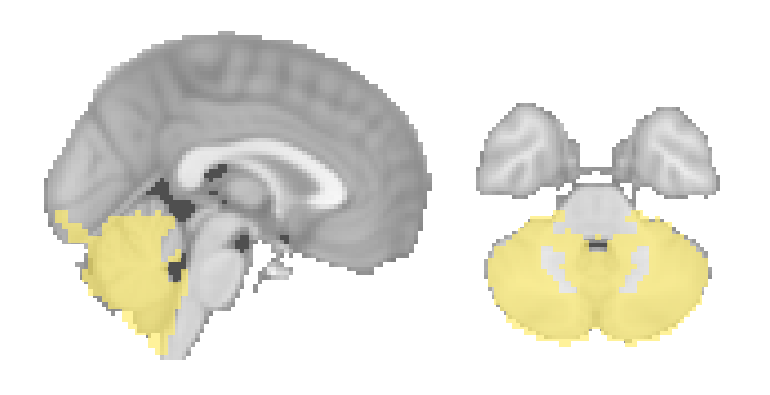

In [10]:
# Make subsets and plot them
for i in range(1,13):
    net_name = label[label.roi==i]['label'].values[0]
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(111)
    f.subplots_adjust(left=0,right=1,bottom=0,top=1)
    tmp = np.zeros_like(brain)
    tmp[brain==i] = i
    i = nib.Nifti1Image(tmp, affine=brain_i.affine, header=brain_i.header)
    display = nlp.plot_roi(i, vmin=1, vmax=12, draw_cross=False, 
                 display_mode='xz', black_bg=False, cmap=lin, axes=ax, annotate=False)
    f.savefig(os.path.join(out_p, 'brain_{}_circleplot.png'.format(net_name)),dpi=200)